In [ ]:
import csv
import re

# Open the Serial monitor data file
with open('temphum.txt', 'r') as f:
    # Read the lines from the file
    lines = f.readlines()

# Define a regular expression pattern to match the expected format
pattern = r'^(\d+:\d+:\d+\.\d+) -> Temperature: ([\d\.]+) °C, Humidity: ([\d\.]+) %$'

# Create a new CSV file
with open('data.csv', 'w', newline='') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)

    # Write the headers to the CSV file
    writer.writerow(['Timestamp', 'Temperature', 'Humidity'])

    # Loop through the lines in the Serial monitor data
    for line in lines:
        # Use the regular expression to match the line
        match = re.match(pattern, line.strip())

        # Check if the line matches the expected format
        if match:
            # Extract the timestamp, temperature, and humidity from the match
            timestamp = match.group(1)
            temperature = match.group(2)
            humidity = match.group(3)

            # Write the data to the CSV file
            writer.writerow([timestamp, temperature, humidity])
        else:
            print('Line skipped:', line)


Line skipped: 

Line skipped: 21:35:13.874 -> Temperature: nan °C, Humidity: nan %

Line skipped: 21:35:16.829 -> Temperature: nan °C, Humidity: nan %

Line skipped: 21:35:18.846 -> Temperature: nan °C, Humidity: nan %



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv('data.csv')

# Remove the Timestamp column from the DataFrame
data = data.drop(columns=['Timestamp'])

# Split the data into features (temperature and humidity) and target (None)
X = data[['Temperature', 'Humidity']]
y = None

# Create a LinearRegression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Use the model to make predictions for future temperature and humidity values
future_data = [[25, 70], [30, 80], [35, 90]]
future_predictions = model.predict(future_data)

# Print the predicted temperature and humidity values for the future data
print(future_predictions)


ValueError: ignored

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted temperature after 2 hours: [20.89550007]


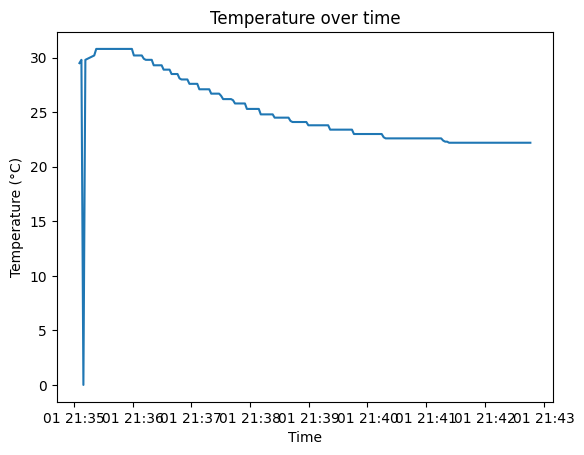

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the data from the CSV file
data = pd.read_csv('data.csv')

# Convert the timestamp to datetime objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S.%f')

# Extract the hour and minute from the timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute

# Split the data into features (hour and minute) and target (temperature)
X = data[['Hour', 'Minute']]
y = data['Temperature']

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the temperature for the next 2 hours
current_time = data['Timestamp'].iloc[-1]
future_time = current_time + timedelta(hours=2)
future_hours = np.array([future_time.hour, future_time.minute]).reshape(1, -1)
future_temperature = model.predict(future_hours)

# Print the predicted temperature
print('Predicted temperature after 2 hours:', future_temperature)

# Plot the temperature over time
plt.plot(data['Timestamp'], data['Temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over time')
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted temperature for the next 10 minutes: [20.89550007 18.56188161 16.22826315 13.89464468 11.56102622  9.22740776]


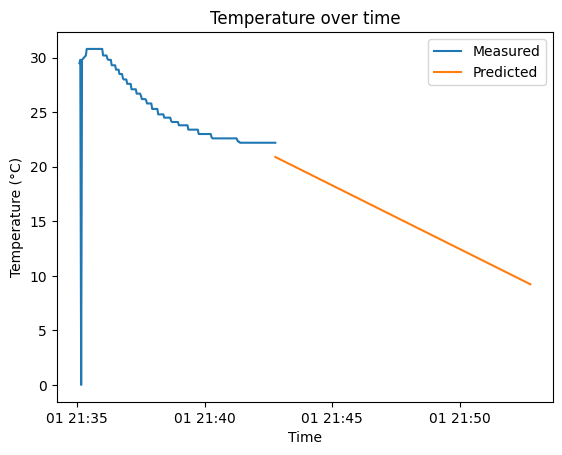

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the data from the CSV file
data = pd.read_csv('data.csv')

# Convert the timestamp to datetime objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S.%f')

# Extract the hour and minute from the timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute

# Split the data into features (hour and minute) and target (temperature)
X = data[['Hour', 'Minute']]
y = data['Temperature']

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the temperature for the next 10 minutes
current_time = data['Timestamp'].iloc[-1]
future_time = current_time + timedelta(minutes=10)
future_timestamps = pd.date_range(current_time, future_time, freq='2min')
future_hours = np.array([future_timestamps.hour, future_timestamps.minute]).T
future_temperature = model.predict(future_hours)

# Print the predicted temperature
print('Predicted temperature for the next 10 minutes:', future_temperature)

# Plot the temperature over time
plt.plot(data['Timestamp'], data['Temperature'], label='Measured')
plt.plot(future_timestamps, future_temperature, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over time')
plt.legend()
plt.show()
